# Data Science Masters :Assignment 24


# Problem:
Build a random forest model after normalizing the variable to house pricing from boston data set.

# Solution: 

Importing Libraries...

In [1]:
# Mathematical computation
import numpy as np

# DateFrame setup
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning pkgs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import datasets

# Data Pre-processing Steps

In [2]:
# loading Dataset
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Exploring Data - Analysis

In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
# Statictical observation
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Data Visualisation

In [5]:
#Analyze both Feature and Targe
df=features
df['ACTUAL_PRICE']= boston.target 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ACTUAL_PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000287C06A8B00>,
      dtype=object)

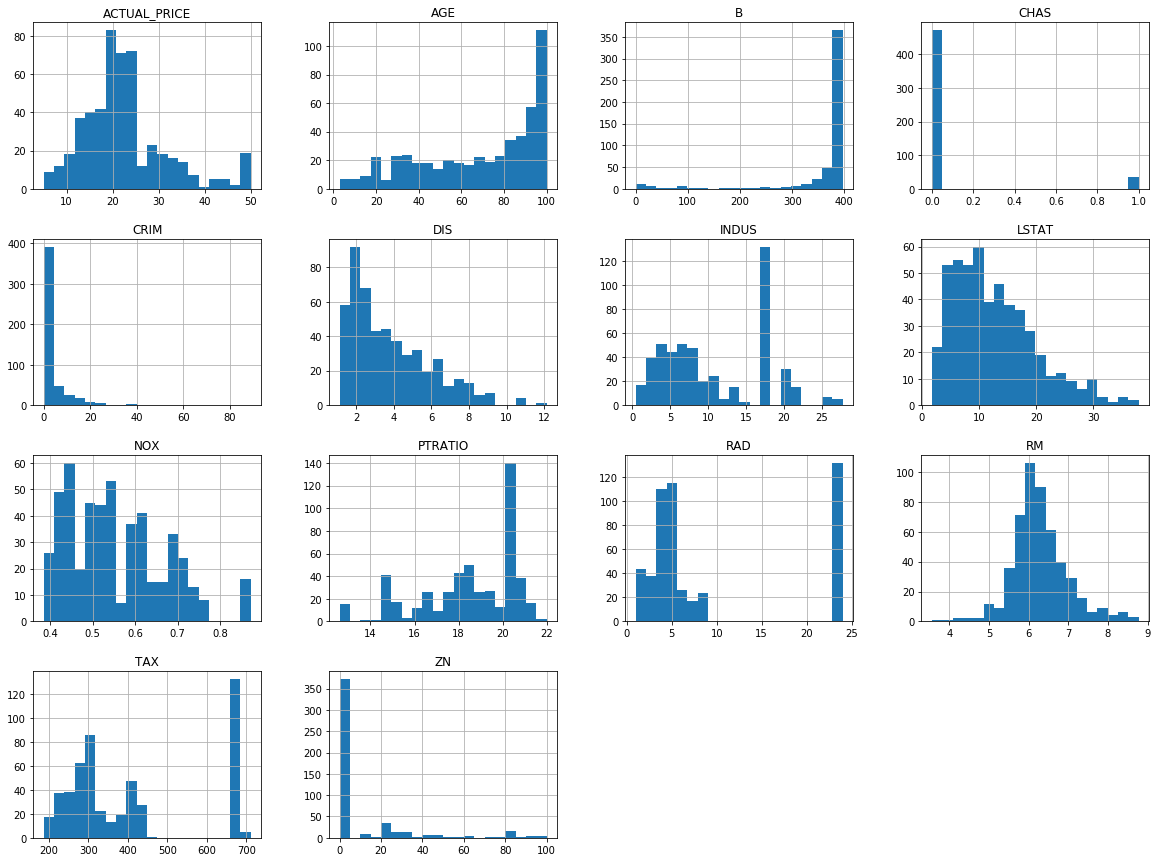

In [6]:
df.hist(bins=20,figsize=(20,15))

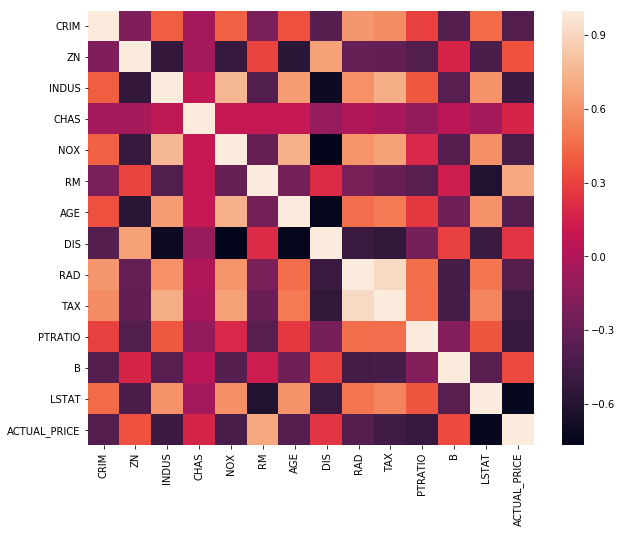

In [7]:
#Analyze Data by using Different Plot
#Show the Coorelations in the picture
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

# Train & Test sets

In [8]:
# Spliting Data to Train and test
X_train, X_test, y_train, y_test = train_test_split(df[boston.feature_names], df['ACTUAL_PRICE'], test_size=0.3,random_state=10)
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((354, 13), (152, 13), (354,), (152,))

# Scaling:

In [9]:
# Normalazing the variables using StandardScaler
sc_X = StandardScaler()
X_train_trans = sc_X.fit_transform(X_train)
X_test_trans = sc_X.fit_transform(X_test)

#taking log values for house prices to make them stable and as we scale X values..
y_train = np.log(y_train)
y_test = np.log(y_test)

# Modeling - Random Forest Regression 

In [10]:
#Random Forest Regression and Fit the train data
randomForest = RandomForestRegressor(n_estimators=500, oob_score=True, n_jobs=-1,random_state=10)
randomForest.fit(X_train_trans, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=10, verbose=0, warm_start=False)

In [11]:
predictions = randomForest.predict(X_test_trans)
r_sq_score = r2_score(y_test, predictions)
r_sq_score

0.8312479085333367

In [12]:
predictions = np.exp(predictions)
y_test = np.exp(y_test)

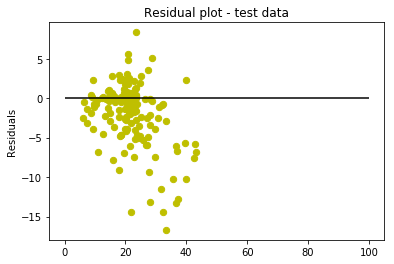

In [13]:
#Evaluate the Model  
#Plot using Test Data with caluclated Residual
plt.scatter(predictions,(predictions-y_test),c='y',s=40)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title('Residual plot - test data')
plt.ylabel('Residuals')
plt.show()

Looks like, the model is good with 0.831 as r2 score and the residuals are scattered randomly around line zero.

In [14]:
#Comparing actual and predicted prices...
comparison = pd.DataFrame()
comparison['ACTUAL_PRICE']=y_test
comparison['PREDICTED_PRICE']= predictions
comparison.head(20)

,ACTUAL_PRICE,PREDICTED_PRICE
305,28.4,23.246171
193,31.1,25.790637
65,23.5,23.480651
349,26.6,26.485112
151,19.6,19.421957
433,14.3,14.456882
161,50.0,37.274205
129,14.3,14.799346
269,20.7,20.467459
226,37.6,39.864085


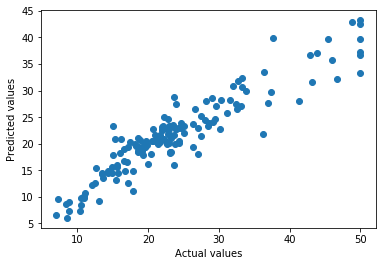

In [15]:
#Visulaize both Actual and Predicted price
plt.scatter(comparison.ACTUAL_PRICE,comparison.PREDICTED_PRICE)
plt.ylabel('Predicted values')
plt.xlabel('Actual values')
plt.show()